In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical insurance data')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


This dataset contains the details of customers in which both numerical and categorical data are present. Here the 'charges' is the target variable.

# Exploratory Data Analysis

In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The datatype of the columns matches the data stored in each column.

In [11]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There appears to be no missing data in the dataset

In [14]:
df.isnull().sum().sum()

0

<Axes: >

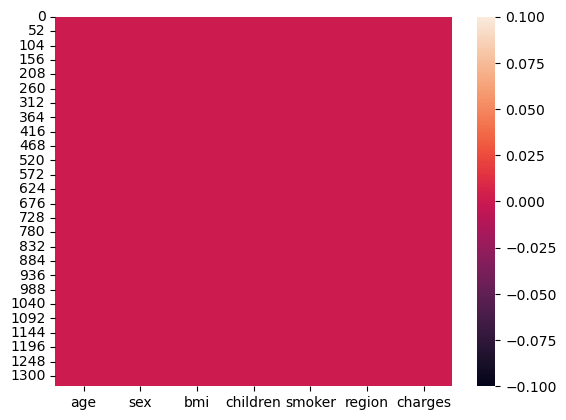

In [15]:
sns.heatmap(df.isnull())

from the visualization map we can see that there are no missing data.

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

we can notice that the data covers four regions and the charges have the same lengths as the dataset

In [17]:
df.nunique().to_frame('no of unique values')

,no of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [18]:
print('Total Duplicate rows',df.duplicated().sum())

Total Duplicate rows 1


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
print('Total Duplicate rows',df.duplicated().sum())

Total Duplicate rows 0


In [22]:
df.shape

(1337, 7)

# Description of Data

In [24]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


the summary of the data looks perfect there is no negative or invalid data
from the above description above we can observe the following;
The count of the columns are the same which means there are no missing data.
The median is of age, bmi are greater than mean which means the data is skewed to the left
and the mean in children and charges are greater than median which means the data is skewed to the right
by summerizing the data we can see that there is outliers in the data.
the standard deviation is high in age, bmi and charges which means the data has a high spread.possible outliers
the difference between 75% and max is high in charges, age, and bmi, which also indicate possible outliers.



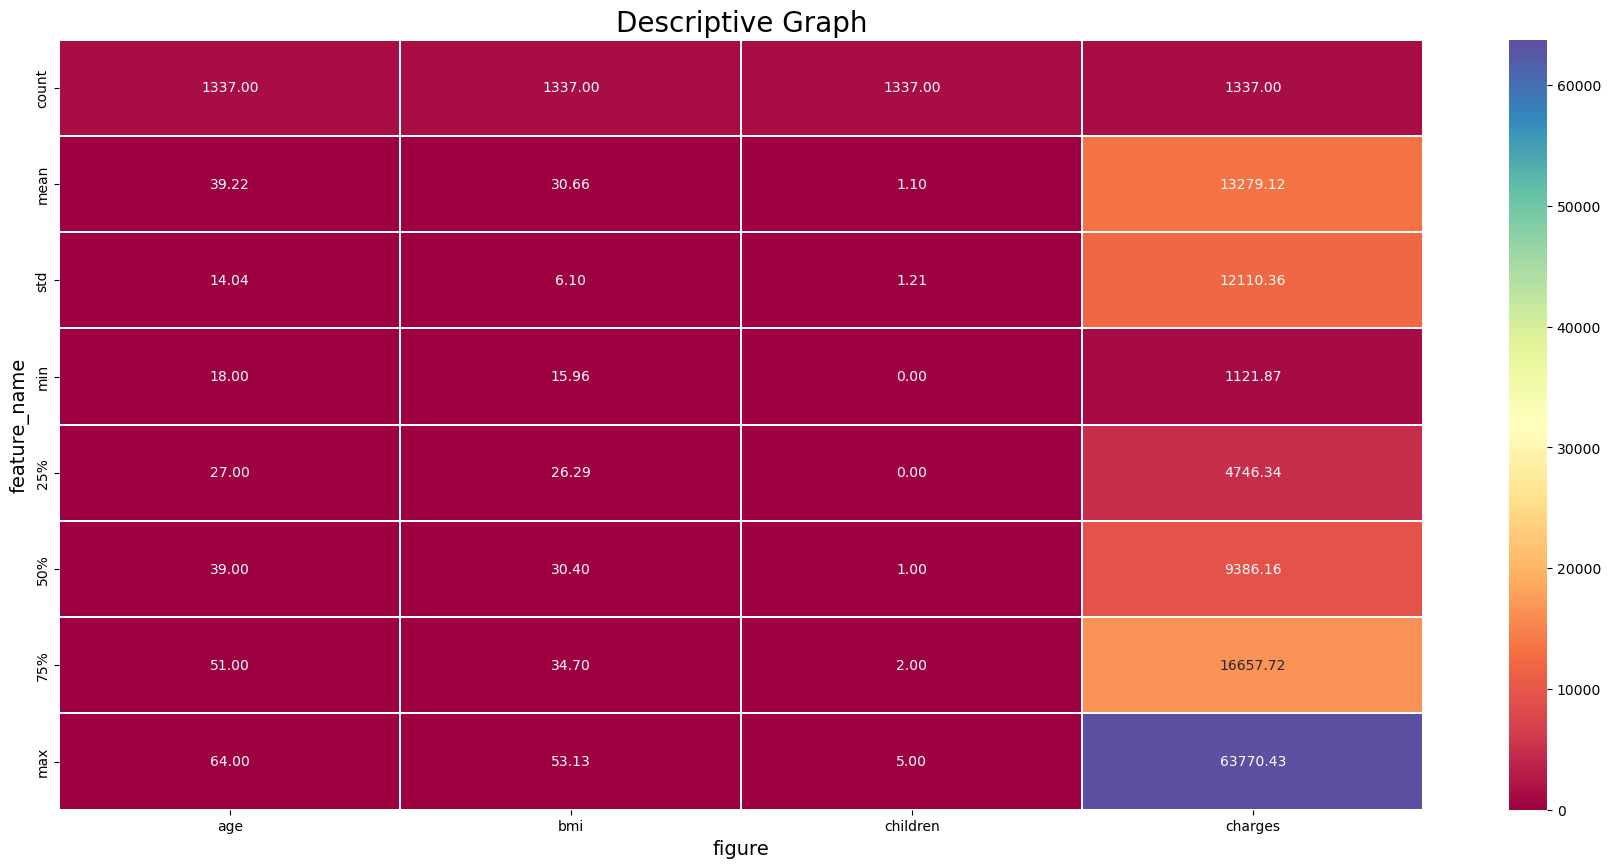

In [25]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

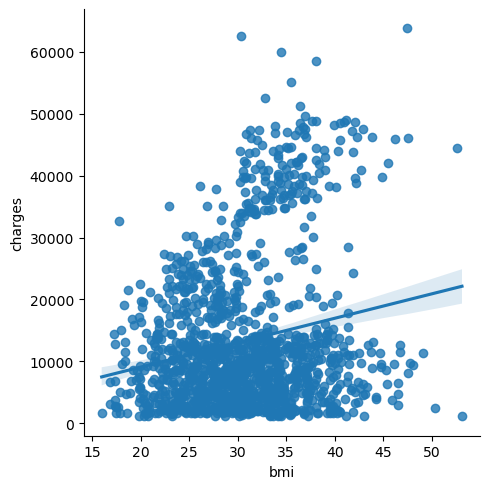

In [26]:
sns.lmplot(x='bmi',y='charges',data=df,palette='colorblind')

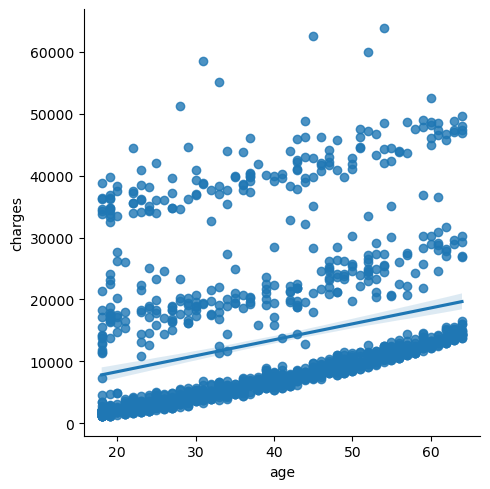

In [27]:
sns.lmplot(x='age',y='charges',data=df,palette='colorblind')

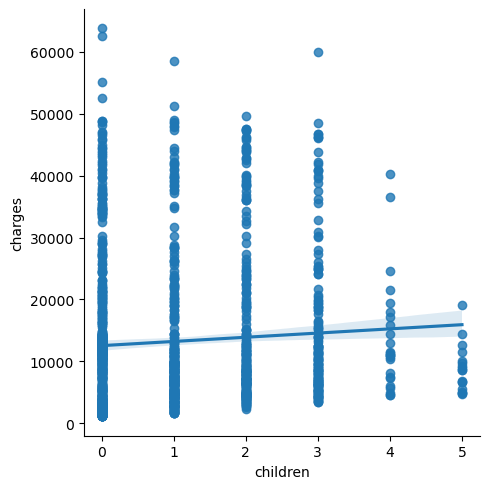

In [28]:
sns.lmplot(x='children',y='charges',data=df,palette='colorblind')

In [30]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:', categorical_col)
print('\n')

categorical columns: ['sex', 'smoker', 'region']




In [31]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:', numerical_col)
print('\n')

numerical columns: ['age', 'bmi', 'children', 'charges']




male      675
female    662
Name: sex, dtype: int64


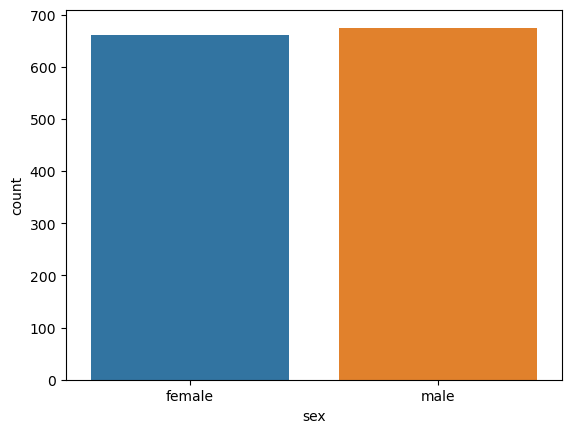

In [33]:
print(df['sex'].value_counts())
ax=sns.countplot(x='sex',data=df)
plt.show()

we can obseve that the sex are almost match

no     1063
yes     274
Name: smoker, dtype: int64


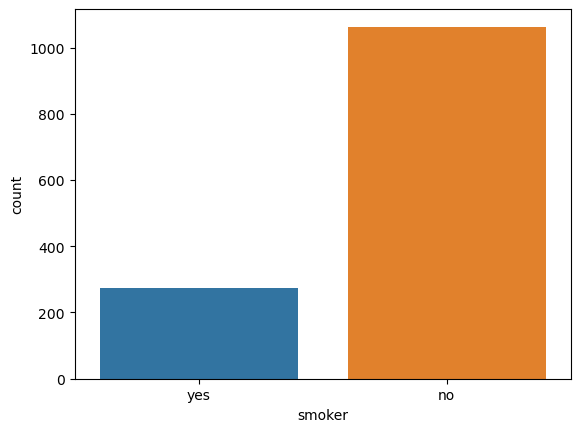

In [34]:
print(df['smoker'].value_counts())
ax=sns.countplot(x='smoker',data=df)
plt.show()

a larger percentage of the data are non smokers

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


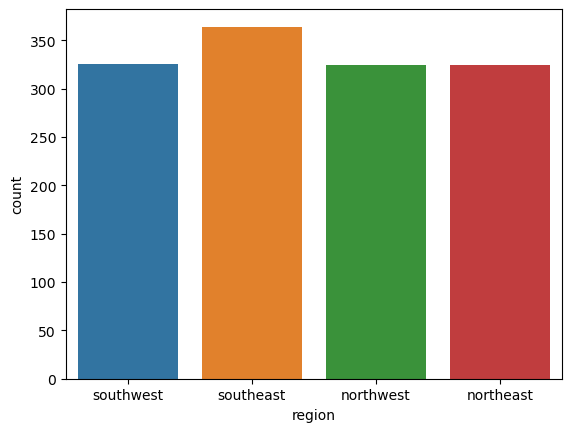

In [35]:
print(df['region'].value_counts())
ax=sns.countplot(x='region',data=df)
plt.show()

the data are almost equal representation of all region

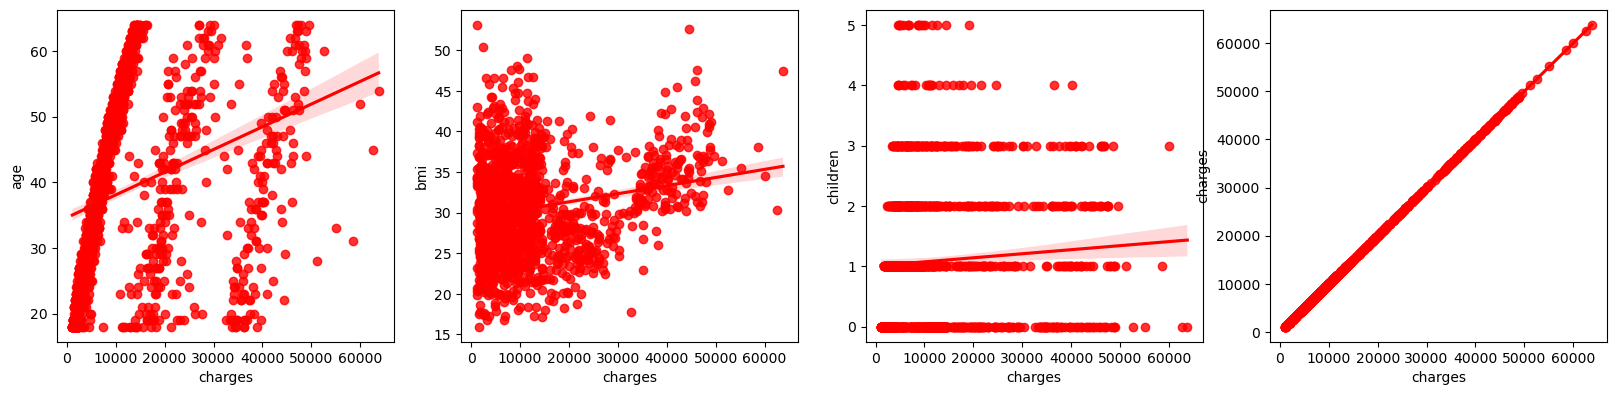

In [36]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='charges',y=i,data=df,color='r')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

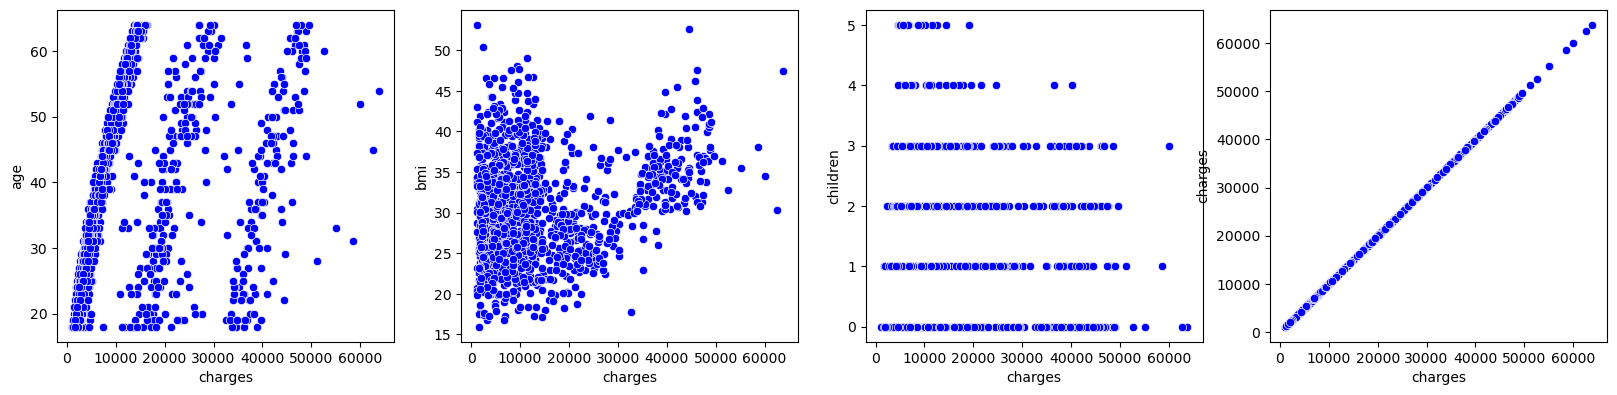

In [37]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='charges',y=i,data=df,color='b')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

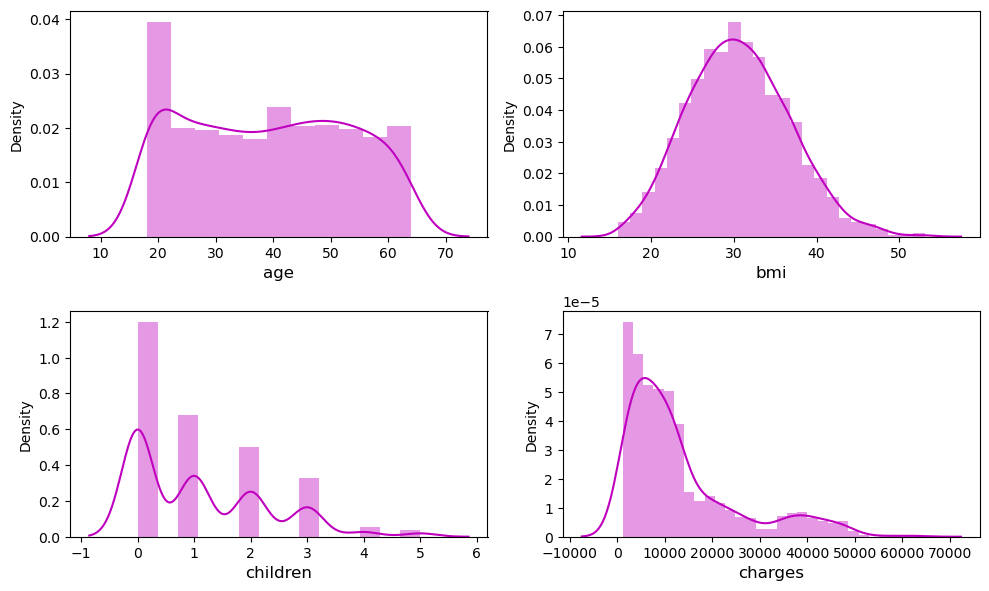

In [38]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

bmi and age are normally distributed, while charges is skewed to the left

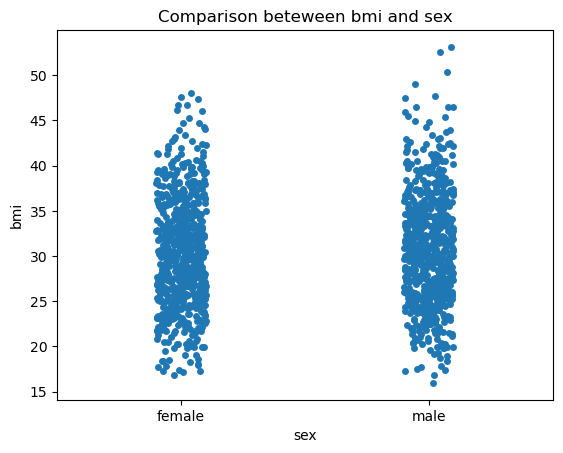

In [40]:
plt.title('Comparison beteween bmi and sex')
sns.stripplot(x='sex', y='bmi',data=df)
plt.show()

there is no significant differnce between the bmi of male and female gender.

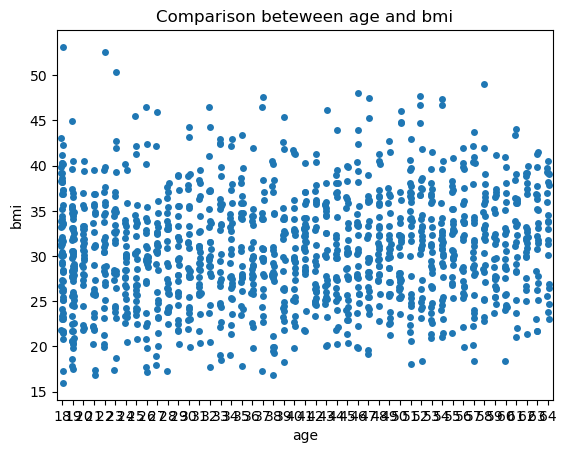

In [41]:
plt.title('Comparison beteween age and bmi')
sns.stripplot(x='age', y='bmi',data=df)
plt.show()

no noticeable relationship between age and bmi

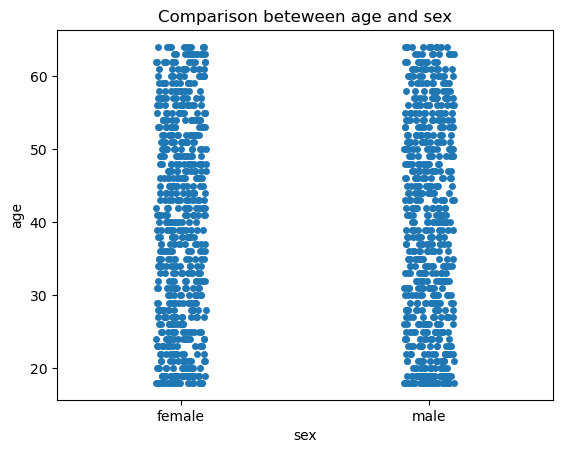

In [43]:
plt.title('Comparison beteween age and sex')
sns.stripplot(x='sex', y='age',data=df)
plt.show()

There are no significant difference between the age distribution of male and female

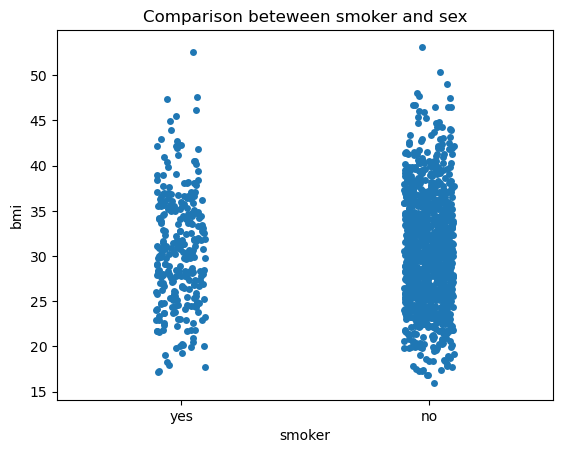

In [46]:
plt.title('Comparison beteween smoker and sex')
sns.stripplot(x='smoker', y='bmi',data=df)
plt.show()

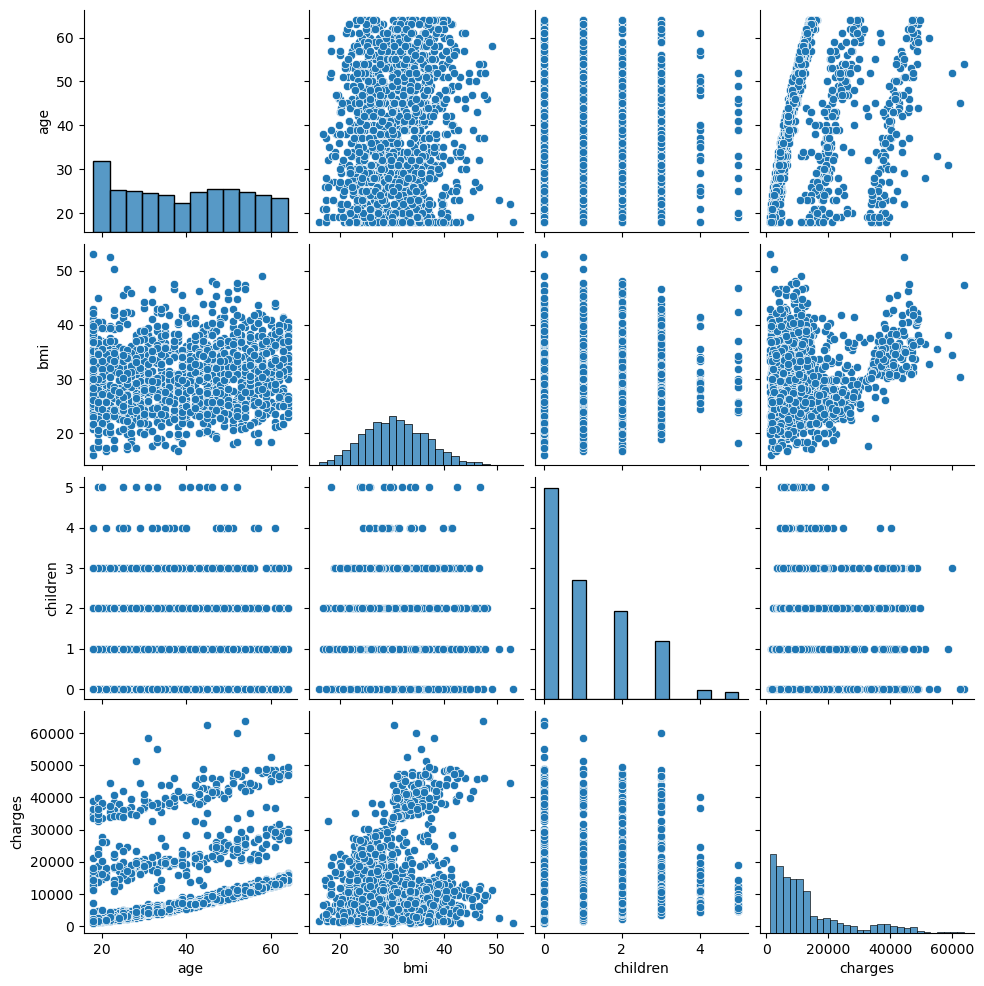

In [49]:
sns.pairplot(data=df,palette ='Set2_r')

The pairplot give the pairwise relationship between the the features.

In [61]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   charges   1337 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 115.9 KB


In [63]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


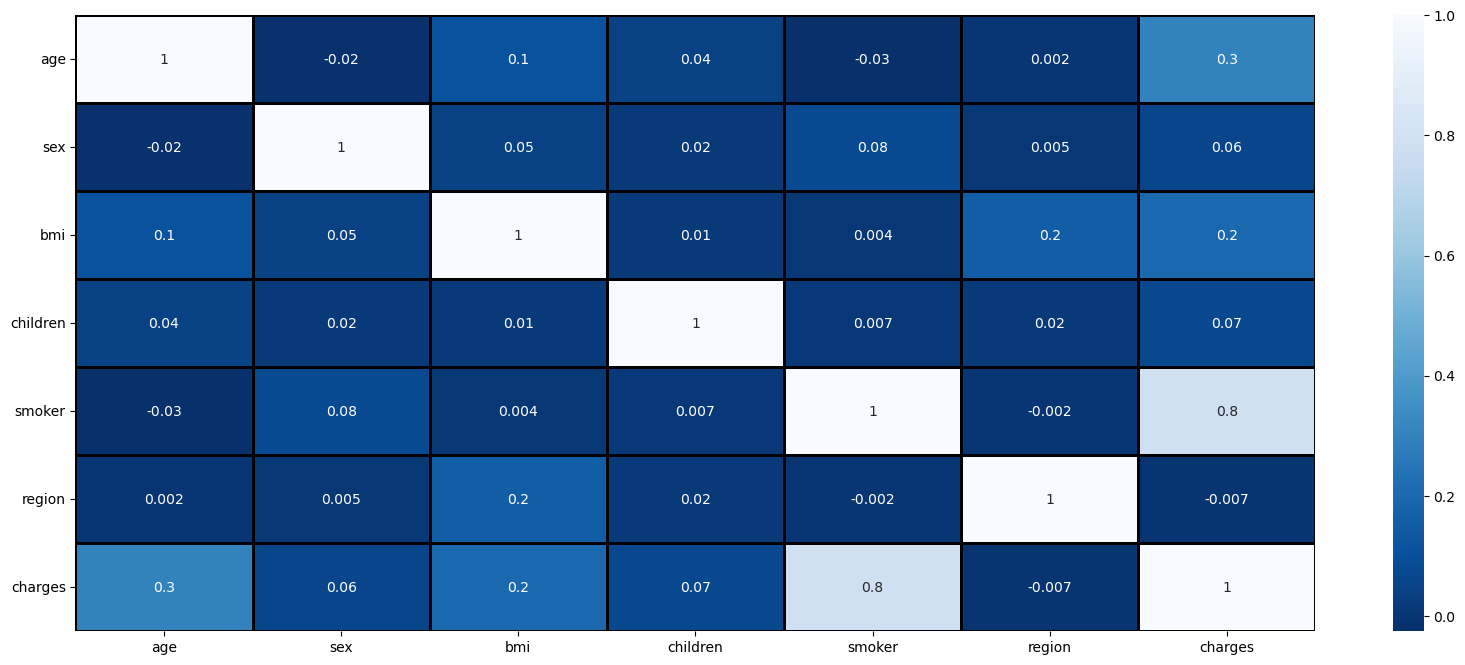

In [66]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linewidths=0-1,fmt='.1g',linecolor='black', annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

1.there is no much corelation between the features and the target except with column smoker
2.all columns are positively correlated to the charges except column region.
3.column smoker is highly positively corelated with target.
4.region has very less corelation with target, we can drop it.

In [62]:
cor=df.corr()

In [58]:
cor

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [60]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

In [68]:
df.drop('region', axis=1,inplace=True)
df.shape

(1337, 6)

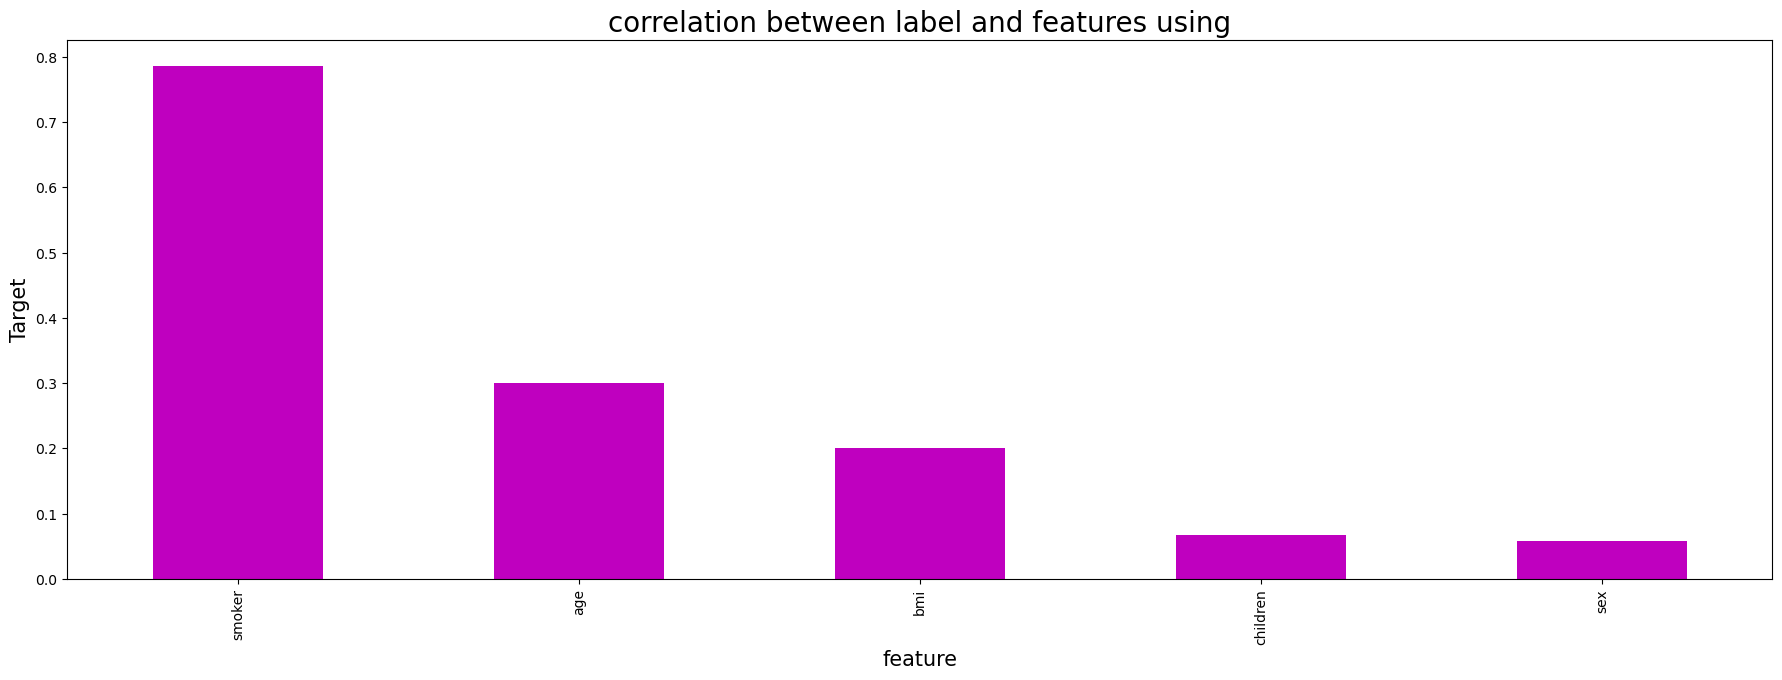

In [76]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind= 'bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features using', fontsize=20)
plt.show()

This Bar chart show us the degree of correlation of the independent variable to the dependent variable
this show smoker has the higest correlation to charges.

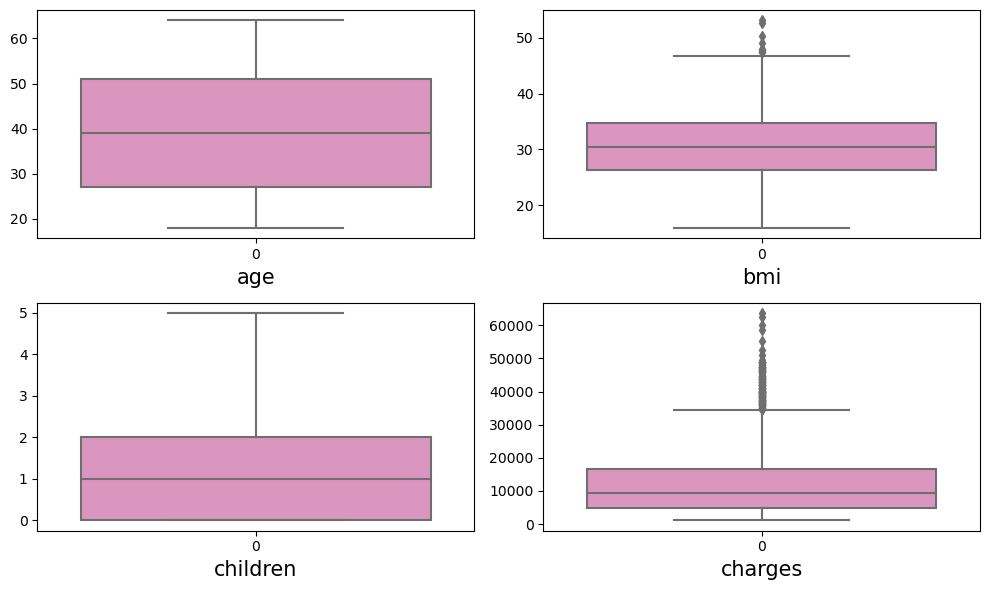

In [51]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for i in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

There are no outliers present in children and age. we also notice outliers present in bmi and charges
we do not need to remove the outliers in charges because it is our target. we will handle outliers in bmi using zcore.


In [52]:
from scipy.stats import zscore
E=df[['bmi']]
z=np.abs(zscore(E))
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [53]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [54]:
z.iloc[116,0]

3.0167243979459

In [69]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1333, 6)

In [70]:
print('old dataframe:', df.shape[0])
print('new dataframe:', df1.shape[0])

old dataframe: 1337
new dataframe: 1333


In [71]:
print('Data loss percentage:', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 0.2991772625280479


the percenatage loss is acceptable

In [72]:
df=df1

# checking the distribution

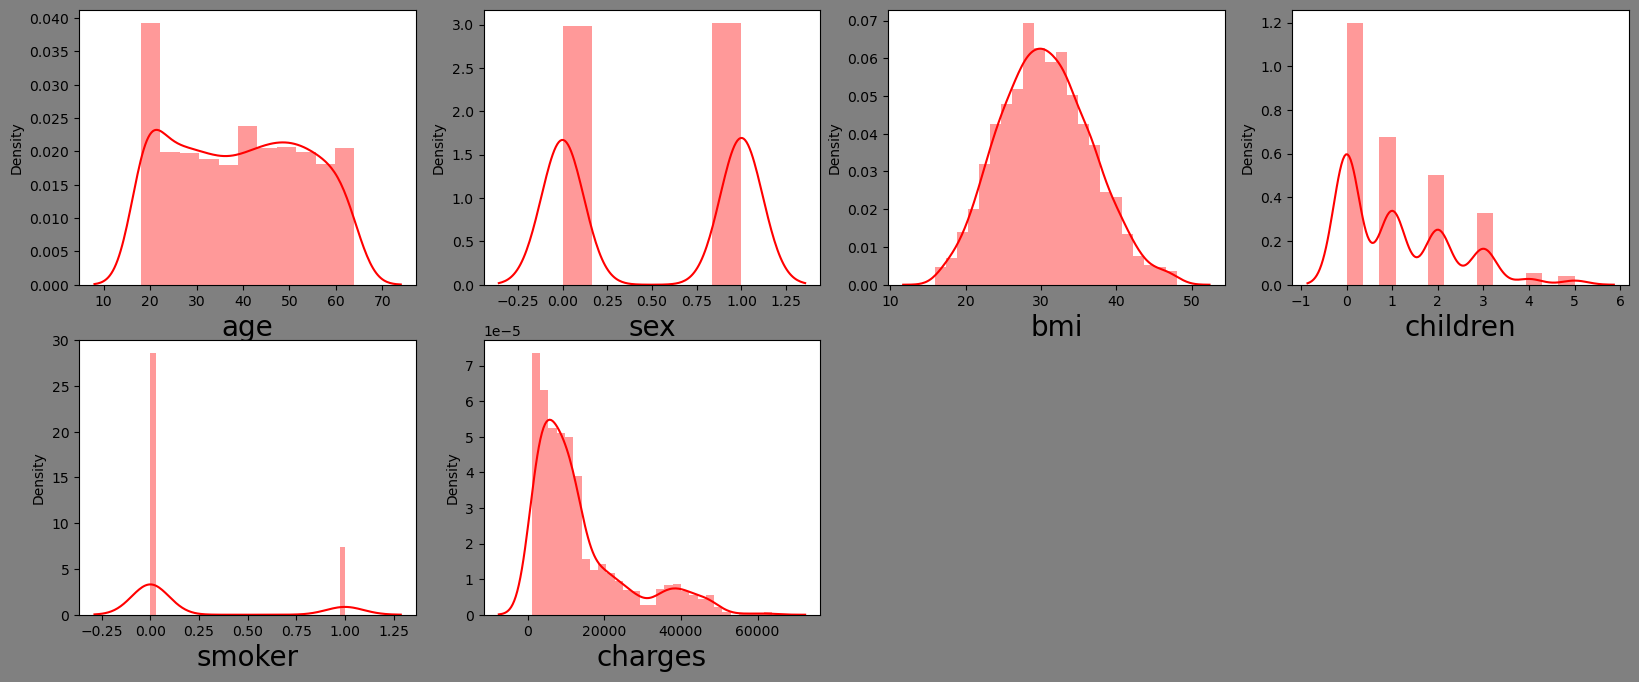

In [74]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber=1
for column in df:
    if plotnumber <=11:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

from the above distribution we can see that the data looks normal except in charges

# checking skewness

In [75]:
df.skew()

age         0.052714
sex        -0.013519
bmi         0.205541
children    0.934451
smoker      1.464636
charges     1.517177
dtype: float64

There skewness in children, smoker and charges columns, we will not be removing skewness from children and 
smokers columns because they are categorical data.and also not be removing skewness from charges because it 
it doesn't impact the training model direct.

In [89]:
df['charges']=np.cbrt(df['charges'])

In [90]:
df.skew()

age         0.052714
sex        -0.013519
bmi         0.205541
children    0.934451
smoker      1.464636
charges     0.516562
dtype: float64

# separating the features

In [91]:
x=df.drop('charges', axis=1)
y=df['charges']
print('feature Dimension',x.shape)
print('Label Dimension',y.shape)

feature Dimension (1333, 5)
Label Dimension (1333,)


# feature Scaling and standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491
2,-0.802147,0.993271,0.399678,1.577282,-0.507491
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491
...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491


# checking variance inflation factor

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['feature']=x.columns
vif

,vif values,feature
0,1.017059,age
1,1.008066,sex
2,1.016104,bmi
3,1.002318,children
4,1.006468,smoker


from the VIF above we say that there is no issue of multicollinearity. 

# Modelling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [94]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('maximum r2 score is', maxAccu,'on random_state', maxRs)

maximum r2 score is 0.8308244823875126 on random_state 12


In [95]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=.30, random_state=maxRs)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [96]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:', r2_score(y_test,pred_LR))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_LR))
print('mean squared error:', mean_squared_error(y_test,pred_LR))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_LR)))

r2_score: 0.8308244823875126
r2_score on training data: 75.39751860710592
mean absolute error: 1.7877312318623484
mean squared error: 7.437637042715369
root mean squared error: 2.7272031539134316


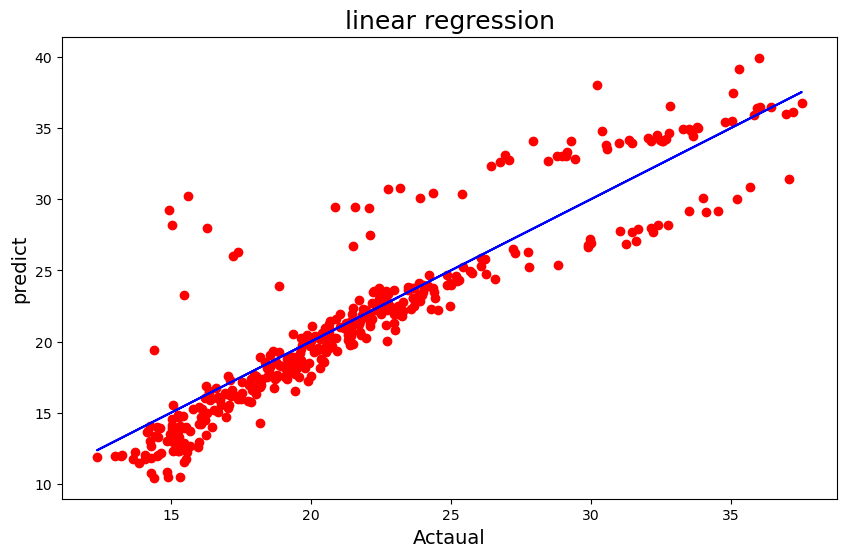

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR, color='b')
plt.xlabel('Actaual', fontsize=14)
plt.ylabel('predict',fontsize=14)
plt.title('linear regression',fontsize=18)
plt.show()

In [98]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:', r2_score(y_test,pred_RFR))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_RFR))
print('mean squared error:', mean_squared_error(y_test,pred_RFR))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.8505748761426324
r2_score on training data: 96.30710997047575
mean absolute error: 1.4374737699556648
mean squared error: 6.569330196226072
root mean squared error: 2.5630704625948293


In [99]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:', r2_score(y_test,pred_knn))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_knn))
print('mean squared error:', mean_squared_error(y_test,pred_knn))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.8386565764027878
r2_score on training data: 75.39751860710592
mean absolute error: 1.6001678300871622
mean squared error: 7.093306649097347
root mean squared error: 2.66332623782693


In [100]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:', r2_score(y_test,pred_GBR))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_GBR))
print('mean squared error:', mean_squared_error(y_test,pred_GBR))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.8773741756386205
r2_score on training data: 86.92527865607002
mean absolute error: 1.4004554071779716
mean squared error: 5.391125066647253
root mean squared error: 2.321879640861527


In [101]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:', r2_score(y_test,pred_lasso))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_lasso))
print('mean squared error:', mean_squared_error(y_test,pred_lasso))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.7396453128744944
r2_score on training data: 68.32097627882001
mean absolute error: 2.5205410747417574
mean squared error: 11.446240523080842
root mean squared error: 3.383229303946282


In [102]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:', r2_score(y_test,pred_rd))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_rd))
print('mean squared error:', mean_squared_error(y_test,pred_rd))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rd)))

r2_score: 0.8308244823875126
r2_score on training data: 75.39751860710592
mean absolute error: 1.7877312318623484
mean squared error: 7.437637042715369
root mean squared error: 2.7272031539134316


In [103]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print('r2_score:', r2_score(y_test,pred_dtc))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_dtc))
print('mean squared error:', mean_squared_error(y_test,pred_dtc))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_dtc)))

r2_score: 0.6714121415434967
r2_score on training data: 99.5398542484311
mean absolute error: 1.8165341063821443
mean squared error: 14.44604551729895
root mean squared error: 3.800795379561882


In [104]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score:', r2_score(y_test,pred_svr))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_svr))
print('mean squared error:', mean_squared_error(y_test,pred_svr))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score: 0.8770793742773704
r2_score on training data: 79.57869191403533
mean absolute error: 0.980790406268497
mean squared error: 5.404085721685408
root mean squared error: 2.324668948836674


In [105]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score:', r2_score(y_test,pred_etr))
print('r2_score on training data:', r2_score(y_train,pred_train)*100)
print('mean absolute error:', mean_absolute_error(y_test,pred_etr))
print('mean squared error:', mean_squared_error(y_test,pred_etr))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score: 0.806116312692766
r2_score on training data: 99.5398542484311
mean absolute error: 1.4801138165752852
mean squared error: 8.523907685021243
root mean squared error: 2.919573202545407


# cross Validation

In [106]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.80600801 0.70770317 0.828826   0.76537717 0.76660536]
0.7749039408681163
difference between r2 score and cross validation score is: 5.59205415193963


In [107]:
score=cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.8339237  0.7129194  0.83690444 0.79101868 0.78579039]
0.7921113226004787
difference between r2 score and cross validation score is: 5.846355354215371


In [108]:
score=cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.84028253 0.70033109 0.84466678 0.7849144  0.78774985]
0.7915889323350556
difference between r2 score and cross validation score is: 4.706764406773223


In [109]:
score=cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.86530775 0.74682727 0.88694766 0.82568758 0.81871162]
0.8286963764369659
difference between r2 score and cross validation score is: 4.867779920165461


In [110]:
score=cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.73381116 0.66471589 0.72692982 0.70622    0.70546812]
0.7074289972457363
difference between r2 score and cross validation score is: 3.221631562875815


In [111]:
score5=cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.80597316 0.70782212 0.8287013  0.76542083 0.76661407]
0.7749062952746245
difference between r2 score and cross validation score is: 5.591818711288809


In [112]:
score=cross_val_score(dtc,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_dtc)-score.mean())*100)

[0.66921832 0.58112439 0.63626122 0.66380778 0.51725764]
0.6135338697687135
difference between r2 score and cross validation score is: 5.787827177478322


In [113]:
score=cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_svr)-score.mean())*100)

[0.87576952 0.72456236 0.87692765 0.80490074 0.79572598]
0.8155772494462805
difference between r2 score and cross validation score is: 6.1502124831089855


In [114]:
score=cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is:',(r2_score(y_test,pred_etr)-score.mean())*100)

[0.78595023 0.67151689 0.7991421  0.75742613 0.74566751]
0.751940571304937
difference between r2 score and cross validation score is: 5.417574138782899


GBR, KNN and lasso are the best performing models.in this case I decided to go with GBR because it gave 
the highest average score.

# HyperParameter Tunning

In [119]:
from sklearn.model_selection import GridSearchCV
param= {'loss':['squared_error','absolute_error','huber','quantile'],'subsample':[0.1,0.2,0.4,0.8,1.0],
       'criterion':['friedman_mse','squared_error'],
       'n_estimators':[1,20,50,100,1000],'random_state':[1,4,10,20]}
GSC=GridSearchCV(GradientBoostingRegressor(),param, cv=5)
GSC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [1, 20, 50, 100, 1000],
                         'random_state': [1, 4, 10, 20],
                         'subsample': [0.1, 0.2, 0.4, 0.8, 1.0]})

In [120]:
GSC.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'n_estimators': 50,
 'random_state': 4,
 'subsample': 1.0}

In [121]:
model=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',n_estimators=50,random_state=4,subsample=1.0)

In [122]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:', r2_score(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.8853870096543338
mean absolute error: 1.3419599729746023
root mean squared error: 2.2447379835406305


In [123]:
import joblib
joblib.dump(model,'medical insurance.pkl')

['medical insurance.pkl']